# Исследование рынка недвижимости Санкт-Петербурга

Цель исследования: определить параметры, влияющие на рыночную стоимость объектов недвижимости в г. Санкт-Петербург и соседних населенных пунктах с 2014 по 2019 гг.

Исходные данные содержат следующие столбцы и сгруппированы в соответствии с источником получения
1. Вписаны пользователями
 - balcony — число балконов
 - floor — этаж
 - floors_total — всего этажей в доме
 - is_apartment — апартаменты (булев тип)
 - kitchen_area — площадь кухни в квадратных метрах (м²)
 - open_plan — свободная планировка (булев тип)
 - rooms — число комнат
 - studio — квартира-студия (булев тип)
 - total_area — площадь квартиры в квадратных метрах (м²)
 - living_area — жилая площадь в квадратных метрах(м²)
 - ceiling_height — высота потолков (м)
 - locality_name — название населённого пункта
 

2. Рассчитаны автоматически
 - first_day_exposition — дата публикации
 - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
 - last_price — цена на момент снятия с публикации
 - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
 - total_images — число фотографий квартиры в объявлении
 - cityCenters_nearest — расстояние до центра города (м)
 - parks_around3000 — число парков в радиусе 3 км
 - parks_nearest — расстояние до ближайшего парка (м)
 - ponds_around3000 — число водоёмов в радиусе 3 км
 - ponds_nearest — расстояние до ближайшего водоёма (м)

## 0. Первый взгляд на данные

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

In [70]:
flats = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
pd.set_option('display.max_columns', 35)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [71]:
flats.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Данные выглядят достаточно "хорошо" - не наблюдается каких-то резких отклонений, как в предыдущем проекте. Очевидна необходимость замены типа данных во многих столбцах, устранения пропусков там, где это возможно (путем замены на подходящие значения), коррекции и удаления НЕРЕАЛЬНЫХ данных, а также чистки от дубликатов. 

## 1. Предобработка данных

Согласно info, пропуски данных имеются в столбцах:

- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- cityCenters_nearest
- parks_around3000
- ponds_around3000
- ponds_nearest
- days_exposition

На мой взгляд, имеются 2 основные причины пропуска данных в объявленных выше столбцах:
 
 1) отсутствие соответствующей строки в форме сбора исходных данных (т.к. неизвестно кто, как и каким образом эти данные собирал и склеивал - вполне возможно, что они сконструированы как Франкенштейн - из частей различных массивов) или необязательность её заполнения;
 
 2) банальное не знание человеком, выставившим объявление, точного (или даже примерного) значения того параметра, о котором идет речь. Так, эта причина, скорее всего, привела к отсутствию почти 40% данных в столбце "высота потолков". Аналогичная ситуация в случае столбцов "этажей всего", "жилая площадь", "площадь кухни", "аппартаменты". Потому, с этими пятью столбцами мало что можно сделать в вопросе замены пустующих значений (как минимум на этапе предобработки данных). Да, безусловно, часть из них (например, "высота потолков" или "этажей всего") могут быть получены обратным путем из информации об адресе или типе здания ("хрущевка", "сталинка" и т.п.), однако, не в нашем случае.
 
Заменим отсутствующие данные в столбце "высота потолков" и "этажей всего" на нулевые (0).

In [72]:
flats['ceiling_height'] = flats['ceiling_height'].fillna(0)
flats['floors_total'] = flats['floors_total'].fillna(0)

Столбец "балконы", вероятно, сформирован по несколько иному принципу. другой. Сложно представить, что человек живет в квартире (или владеет квартирой) и не знает, сколько там балконов и есть ли они. Поэтому, вероятней всего, отсутствующие значения указывают нам именно на отсутствие в квартире балкона. 

Потому, пропущенные данные в "балконы" можно заменить на 0. 

In [73]:
flats['balcony'] = flats['balcony'].fillna(0)

Столбец "аппартамены" заменим по аналогии с балконами - отсутствие данных, скорее всего, сообщает нам о том, что данный объект - не аппартаменты 

(Квартира, если бы ты была аппартаментами, ты бы мне сказала? Конечно, милый)

In [74]:
flats['is_apartment'] = flats['is_apartment'].fillna(0)

Столбцы со значениями жилой площади и площади кухни заменим на индикаторные значения (999), дабы иметь представление о положении пропусков при дальнейшем анализе.

In [75]:
flats['kitchen_area'] = flats['kitchen_area'].fillna(999)
flats['living_area'] = flats['living_area'].fillna(999)

В случае с местоположением квартиры, имеется 49 строк с пропусками. Их я решил удалить, т.к. местоположение - важнейший при решении нашей задачи параметр. Кроме того, его отсутствие невосполнимо из имеющихся данных. Причина возникновения - скорее всего, ошибка человеческого или технического характера, т.к. подобные данные (с отсутствующим значением местоположения) не должны были в принципе попасть в соответствующий массив для анализа.


In [76]:
flats['locality_name'] = flats['locality_name'].fillna('0')
flats = flats[flats['locality_name'] != '0'].reset_index(drop = True)

В случае с автоматически рассчитанными данными, ситуация обстоит следующим образом - почти все пропущенные значения приходятся на случаи, когда объекты расположены НЕ в Санкт-Петербурге, т.е. всевозможные деревни, поселки городского типа и тому подобное, в которых, как правило, нет ни парков, ни прудов. Можем ли мы произвести соответствующую замену? Можем. При этом нам необходимо выбрать значение, которое будет подходящим в нашем случае. 0 использовать не имеет смысла (для столбцов-расстояний), поэтому выберем самое большое число, того же порядка, что и остальные значения и заменим на него (4 порядка - 9999, 5 - 99999 и т.д.).

Сделаем это для пропусков в столбцах "airports_nearest", "cityCenters_nearest", "parks_nearest", "ponds_nearest"

In [77]:
flats['airports_nearest'] = flats['airports_nearest'].fillna(99999)
flats['cityCenters_nearest'] = flats['cityCenters_nearest'].fillna(99999) 
flats['parks_nearest'] = flats['parks_nearest'].fillna(99999) 
flats['ponds_nearest'] = flats['ponds_nearest'].fillna(99999) 

В столбцах "parks_nearest_3000", "ponds_nearest_3000" имеет смысл вместо пропусков вставить нули - эти ячейки связаны с остальными рассчитанными автоматически - нет расстояния, нет пруда.

In [78]:
flats['parks_around3000'] = flats['parks_around3000'].fillna(0) 
flats['ponds_around3000'] = flats['ponds_around3000'].fillna(0) 

Столбец "days_exposition" — сколько дней было размещено объявление (от публикации до снятия). Пропуски в данном столбце могут быть следствием того, что объявления на момент сбора данных ещё не были сняты с публикации. Заполнение этих ячеек может быть осуществлено различными способами, однако, они, с высокой долей вероятности, могут повлиять на корректность дальнейшего анализа. Заменим пропуски на предельное значение, дабы иметь возможность при дальнейшем анализе, во-первых, работать со столбцом, не вспоминая про пропуски, а, во-вторых, вспомнить про пропуски, во время анализа по данному столбцу.

In [79]:
flats['days_exposition'] = flats['days_exposition'].fillna(9999) 

Пропуски в основных интересующих нас столбцах заполнены, переходим к изменению типа представленных данных.

Изменим на целочисленный тип данные в столбцах last_price, floors_total, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. Для балконов, этажей, а также количества парков и прудов отличное от целочисленного значение не имеет смысла. Для остальных столбцов (не столь "придирчивых") целочисленного типа данных также будет достаточно, поскольку в нашем случае нет смысла расходовать дополнительную память на вещественный тип.

In [80]:
int_list = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 
            'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']

def astype_int(data, work_list):
    for column in work_list:
        data[column] = data[column].astype(int)
        
astype_int(flats,int_list)

Преобразуем столбец с датой публикации в читабельный вид - отрежем повторяющиеся нули времени и оставим только день-месяц-год.

In [81]:
flats['first_day_exposition'] = pd.to_datetime(flats['first_day_exposition'])

Столбец с названиями населенных пунктов, также, по-хорошему, следует скорректировать, т.к. там имеются дублирующие друг друга по смыслу значения, отличающиеся на 1 букву - "посЁлок Мурино", "посЕлок Мурино", "Мурино" и т.п. Однако, на данном этапе, я не вижу в этом достаточного смысла, т.к. в имеющихся данных УЖЕ прослеживается необходимое различие - где Петербург, а где - нет. Оставляем столбец без изменений.

In [82]:
flats['first_day_exposition'] = pd.to_datetime(flats['first_day_exposition'])
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null int64
cityCenters_nearest     23650 non-null int64
parks_around3000        23650 non-null int64
parks_nearest           23650 non-null int64
ponds_around3000   

Пропуски заполнены, предварительная обработка данных проведена.

В принципе, уже сейчас можно предположить, что столбцы "без пропусков" рассматриваются владельцами квартир в качестве важнейших (чтобы это не значило) параметров при покупке/продаже. И именно они, в дальнейшем, будут определены нами в качестве основных критериев формирования цены на объекты недвижимости.

## 2. Расчет вспомогательных признаков

В соответствии с заданием в таблицу необходимо добавить несколько "расчетных" столбцов:
 - цену квадратного метра;
 - день недели, месяц и год публикации объявления;
 - этаж квартиры; варианты — первый, последний, другой;
 - соотношение жилой и общей площади, а также отношение площади кухни к общей.

Цена квадратного метра рассчитывается как отношение значений из столбца "last_price" к значениям столбца "total_area". Заодно преобразуем тип значений в столбце "цена квадратного метра" в целочисленный - нам достаточно такой точности значений.

In [83]:
flats['m2_price'] = flats['last_price'] / flats['total_area']
flats['m2_price'] = flats['m2_price'].astype(int)

Для определения дня недели воспользуемся встроенной фунцией библиотеки datetime - isoweekday, которая возвращает из значения даты номер дня недели - 1 если понедельник, 2 если вторник и т.д. По аналогии поступим и со столбцом "месяц", только здесь воспользуемся фнукцией month. 

Оформим эти преобразования в виде функций, чтобы затем применить их к соответствующему столбцу.

Столбец "год" легко получить с помощью встроенной функции year - применяем её к столбцу с датой опубликования объявления.

In [84]:
def weekday_definition(date):
    return date.isoweekday()

def month_definition(date):
    return date.month

flats['weekday'] = flats['first_day_exposition'].apply(weekday_definition)
flats['month'] = flats['first_day_exposition'].apply(month_definition)
flats['year'] = flats['first_day_exposition'].dt.year

Для категоризации квартир по этажам, напишем функцию, которая будет возвращать значение "Первый", когда значение в столбце "floor" равно единице, значение "последний", когда значения в столбцах "floor" и "floors_total" совпадают и значение "другой" во всех остальных случаях. Поскольку нам необходимы 2 столбца, функция будет принимать в качестве входного параметра всю строчку целиком.

In [85]:
def floor_type(row):
    if row['floor'] == 1:
        return "Первый"
    elif row['floor'] == row['floors_total']:
        return "Последний"
    else:
        return "Другой"
    
flats['floor_type'] = flats.apply(floor_type, axis = 1)

Для определения долей жилой площади и площади кухни разделим значения из соответствующих столбцов на значение из столбца "total_area". Полученные значения округлим до 3 знака после запятой - точности в 0.1% нам будет более чем достаточно.

In [86]:
flats['living_area_ratio'] = round(flats['living_area'] / flats['total_area'], 3)
flats['kitchen_area_ratio'] = round(flats['kitchen_area'] / flats['total_area'], 3)

Столбцы успешно добавлены в датафрейм. Хотя среди полученных значений явно присутствуют некорректные - например, в столбце "living_area_ratio", они крайне наглядны (больше 1) и при дальнейшем анализе могут быть легко отброшены.

In [87]:
flats.loc[:, 'm2_price':'kitchen_area_ratio'].head(15)

,m2_price,weekday,month,year,floor_type,living_area_ratio,kitchen_area_ratio
0,120370,4,3,2019,Другой,0.472,0.231
1,82920,2,12,2018,Первый,0.460,0.272
2,92785,4,8,2015,Другой,0.612,0.148
3,408176,5,7,2015,Другой,6.283,6.283
4,100000,2,6,2018,Другой,0.320,0.410
5,95065,1,9,2018,Другой,0.474,0.299
6,99195,4,11,2017,Другой,0.284,0.386
7,110544,4,4,2019,Другой,13.953,0.264
8,87454,3,5,2018,Другой,0.465,0.266
9,88524,7,2,2017,Другой,0.715,0.107


## 3. Исследовательский анализ данных

Исследовательский анализ данных предполагает следующее:
 - Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
 - Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
 - Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
 - Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
 - Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
 - Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
 - Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Изучение параметров предполагает анализ имеющихся в столбце значений, определение редких и выбивающихся значений, а также формулировку возможных причин их возникновения. Начнем со столбца "цена". Посмотрим на основные статистические показатели представленного массива данных.

In [88]:
flats['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Необычным выглядит значение минимума - 12190 рублей. Наверняка, это является выбросом и значения (это и близкие) необходимо удалить из датафрейма. При этом также можно утверждать о наличии существенного разброса между средним и экстремальными значениями в представленных данных - среднее квадратичное отклонение больше как среднего, так и медианного значений столбца (почти 11 миллионов против 6.54 и 4.65 соответственно). Однако, в случае цены это вполне нормальное явление, т.к. цены на квартиры могут варьироваться в рамках 1 нас. пункта (тем более СПб) от 0 до +бесконечности.
Построим гистограмму.

Text(0.5, 0, 'Цена квартиры')

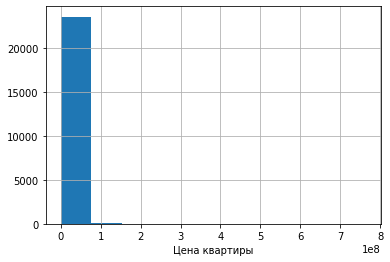

In [89]:
flats['last_price'].hist()
plt.xlabel("Цена квартиры")

В отсутствие границ и других "форм", гистограмма принимает следующий вид. Очевидно, что это позволяет нам без тени сомнений отбросить значения, выше 20 млн - данных выше этой точки практически нет. Сделаем это и посмотрим на объем отброшенного.

In [90]:
flats_below_20mln = flats[flats['last_price'] <= 20000000].reset_index(drop = True)
flats_below_20mln['last_price'].count()

22944

Отброшено чуть более 700 значений. Это незначительный объем, поэтому мы можем это сделать. Тем более, что мы сохранили полученные данные в отдельный датафрейм. Построим гистограмму вновь.

Text(0.5, 0, 'Цена квартиры')

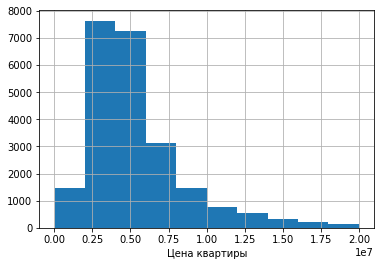

In [91]:
flats_below_20mln['last_price'].hist()
plt.xlabel("Цена квартиры")

Мы получили гистограмму, имеющую более-менее нормальный вид. Увеличим число корзин до 20 (по 1 на каждый 1 млн. цены) и посмотрим на предмет выбросов.

Text(0.5, 0, 'Цена квартиры')

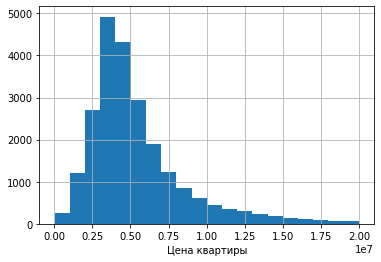

In [92]:
flats_below_20mln['last_price'].hist(bins = 20)
plt.xlabel("Цена квартиры")

Данные приняли достойный вид, на первый взгляд выбросов нет. Проверим ещё раз статистические показатели данного столбца

In [93]:
flats_below_20mln['last_price'].describe()

count    2.294400e+04
mean     5.421594e+06
std      3.218715e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      2.000000e+07
Name: last_price, dtype: float64

Очевидно существенное снижение стандартного отклонения - почти в 3 раза - до 3.2 млн. Стало быть, мы корректно обрезали представленные данные. Переходим к следующему показателю - число комнат. Поскольку для этого параметра возможных значений относительно немного, сразу же построим для него гистограмму. Делать это будем по датафрейму с квартирами дешевле 20 млн.

Text(0.5, 0, 'Число комнат')

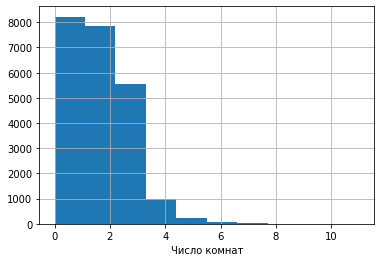

In [94]:
flats_below_20mln['rooms'].hist()
plt.xlabel("Число комнат")

Здесь также имеет смысл отсечь всё, что находится выше 7 комнат. Как правило, квартиры с таким числом комнат "не ходовые", потому в рамках нашего анализа они не имеют особого смысла. Отсечем и посмотрим на результаты. В ту же степь отправим квартиры с 0 комнат. Ведь если комнат нет, это разве квартира?

In [95]:
flats_below_7_rooms = flats_below_20mln[
    (flats_below_20mln['rooms'] <= 7) &
    (flats_below_20mln['rooms'] != 0)].reset_index(drop = True)
flats_below_7_rooms['rooms'].count()

22739

Квартир с 9, 10 и 0 комнат оказалось всего около 200. Оставляем наши изменения и строим по их значениям гистограмму, заранее задав количество корзин = 8.

Text(0.5, 0, 'Число комнат')

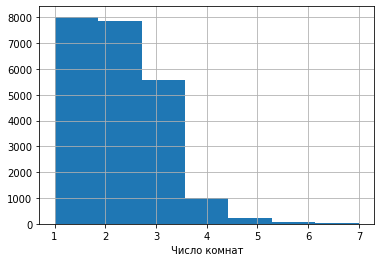

In [96]:
flats_below_7_rooms['rooms'].hist(bins = 7)
plt.xlabel("Число комнат")

Полученная гистограмма похожа на реальное положение дел, потому переходим к следующему показателю - высоте потолков. Высота потолков (особенно в городских квартирах) также весьма ограничена. Как правило, в зависимости от типа дома, она может варьироваться от 2.5 (в "хрущевках") до 5-6 метров в пентхаусах. Посмотрим, какие данные предложены нам для анализа. Построим гистограмму.

Text(0.5, 0, 'Высота потолков')

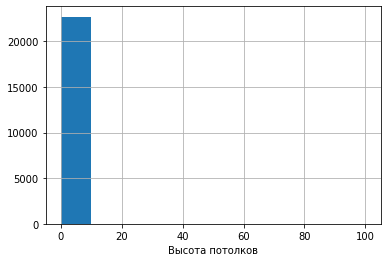

In [97]:
flats_below_7_rooms['ceiling_height'].hist()
plt.xlabel("Высота потолков")

Высота потолков в 100 метров? Явно некорректное значение. Ограничим гистограмму значением 10 метров и посмотрим на данные ещё раз. Корзин сделаем в 10 раз больше - по 1 на каждые 0.1 метра высоты. Помним также, что у нас изначально здесь имелись пропуски, которые мы обозначили через 0. 

Text(0.5, 0, 'Высота потолков')

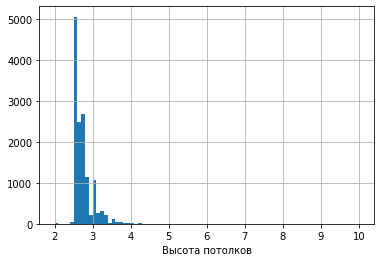

In [98]:
flats_below_7_rooms['ceiling_height'].hist(bins = 80, range = (2,10))
plt.xlabel("Высота потолков")

Судя по имеющимся данным, значений высоты потолков более 4 метров практически не встречается, не говоря уже о 6 и большем. Ещё раз перестраиваем гистограмму.

Text(0.5, 0, 'Высота потолков')

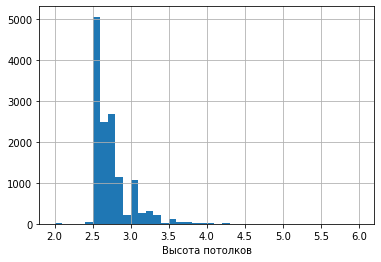

In [99]:
flats_below_7_rooms['ceiling_height'].hist(bins = 40, range = (2,6))
plt.xlabel("Высота потолков")

Полученная гистограмма позволяет сделать следующие выводы. Значения выше 4.5 метров - явный выброс. Ниже 2.4 - аналогично. Обрезаем датафрейм таким образом, чтобы в нем остались только интересующие нас значения и строим итоговую гистограмму распределения значений высоты.

Text(0.5, 0, 'Высота потолков')

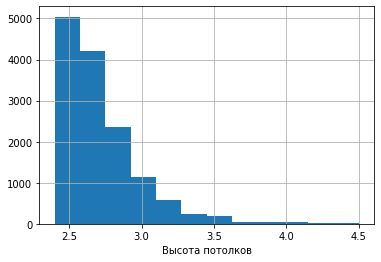

In [100]:
flats_ceilings_clean = flats_below_7_rooms[
    (flats_below_7_rooms['ceiling_height'] <= 4.5) 
    & (flats_below_7_rooms['ceiling_height'] >= 2.4)]

flats_ceilings_clean['ceiling_height'].hist(bins = 12)
plt.xlabel("Высота потолков")

Получили распределение данных, имеющее статистический смысл и пригодное для дальнейшего анализа. Переходим к самому большому блоку - площади квартир. Поскольку указания на какую-то конкретную площадь нет, проанализируем каждую из имеющихся площадей - площадь общую, площадь жилую и площадь кухни.

1. Площадь общая.

Text(0.5, 0, 'Общая площадь')

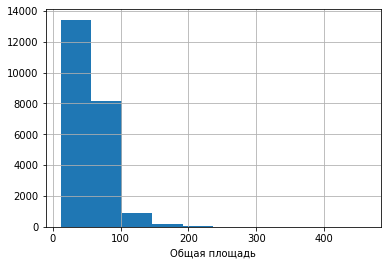

In [101]:
flats_below_7_rooms['total_area'].hist()
plt.xlabel("Общая площадь")

Судя по представленным данным, квартир с площадью более 250 м2 в выборке практически не присутствует - их доля неизмеримо мала по сравнению с числом квартир с площадью до 100 м2. Ограничим дата фрейм значением 250 м2 и посмотрим сколько значений мы в таком случае потеряем.

In [102]:
flats_total_area_below_250 = flats_below_7_rooms[flats_below_7_rooms['total_area'] <= 250]
flats_total_area_below_250['total_area'].count()

22733

Квартир с площадью более 250 м2 оказалось около 20. Их потеря не помешает реализации нашей задачи. Строим гистограмму для обновленного датафрейма. 

Text(0.5, 0, 'Общая площадь')

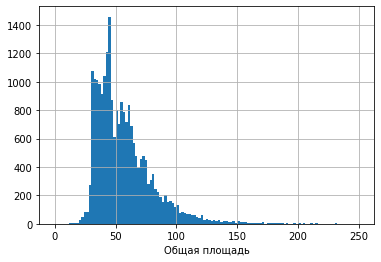

In [103]:
flats_total_area_below_250['total_area'].hist(range = (0,250), bins = 125)
plt.xlabel("Общая площадь")

Похоже, что значение 250 м2 также слишком велико и нам будет достаточно значения в 200 м2. Снизу ограничим датафрейм значением в 20 м2 - квартир с меньшей площадью также практически не существует ни в природе, ни в нашем датафрейме. 

Text(0.5, 0, 'Общая площадь')

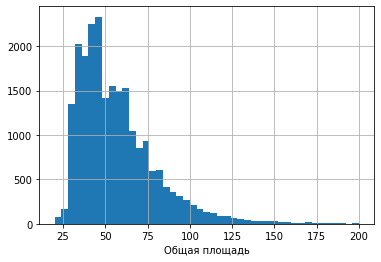

In [104]:
flats_total_area_below_200 = flats_total_area_below_250[
    (flats_total_area_below_250['total_area'] >= 20) 
    & (flats_total_area_below_250['total_area'] <= 200)]

flats_total_area_below_200['total_area'].hist(range = (20,200), bins = 45)
plt.xlabel("Общая площадь")

На данном графике мы, вероятно, имеем сопряжение сразу нескольких нормальных распределений - разделенных в зависимости от числа комнат. Проверим нашу гипотезу, построив соответствующие гистограммы на одном графике. 

Text(0.5, 0, 'Общая площадь')

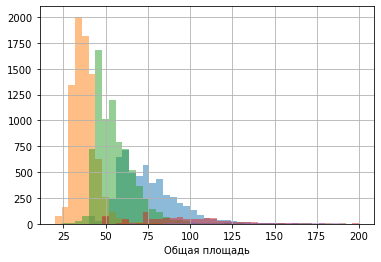

In [105]:
def room_number_hist_plot(data, column, rng_d, rng_u, bns, alph):
    room_number = []
    room_number = data['rooms'].unique()
    for i in room_number:
        data[data['rooms'] == i][column].hist(range = (rng_d, rng_u), bins = bns, alpha = alph)
    
    
room_number_hist_plot(flats_total_area_below_200, 'total_area', 20, 200, 45, 0.5)
plt.xlabel("Общая площадь")

Действительно, для одно-, двух- и трехкомнатных квартир можно увидеть распределения близкие к нормальным. Остальные варианты представлены в датафрейме слабо и не являются целью нашего анализа, потому их распределение не имеет для нас особого значения. Гипотеза о сопряжении нескольких нормальных распределений на одном графике подтверждена. Переходим к жилой площади. 

2. Жилая площадь

По аналогии строим первичную гистограмму и проводим её анализ. Поскольку изначально в данном столбце присутствовали выбросы, а также у нас УЖЕ общая площадь квартиры ограничена 200 м2, построим гистограмму в аналогичных границах. Нижнюю границу делаем равной 0, т.к. жилая площадь в квартире площадью 20 м2 в любом случае меньше 20 м2.

Text(0.5, 0, 'Жилая площадь')

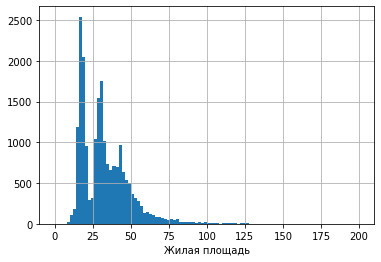

In [106]:
flats_total_area_below_200['living_area'].hist(range = (0,200), bins = 100)
plt.xlabel("Жилая площадь")

Видим ситуацию, вероятно, аналогичую общей площади квартир - несколько пиков, в зависимости от числа комнат. Проверим её, воспользовавшись написанной ранее функцией room_number_hist_plot.

Text(0.5, 0, 'Жилая площадь')

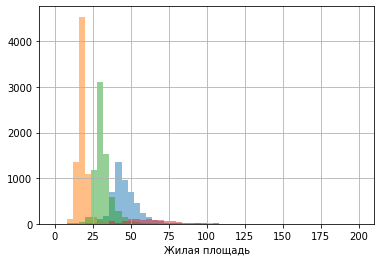

In [107]:
room_number_hist_plot(flats_total_area_below_200, 'living_area', 0, 200, 50, 0.5)
plt.xlabel("Жилая площадь")

Снова - 3 нормальных распределения на 1 графике. Однокомнатные, двухкомнатные и трехкомнатные квартиры в приоритете. Переходим к площади кухни.

3. Площадь кухни

Для определения верхней границы построения первичной гистограммы, найдем максимальной значение разницы между столбцов общей площади и жилой площади (в наивном предположении, что в квартире отсуствуют корридоры). 

Text(0.5, 0, 'Площадь кухни')

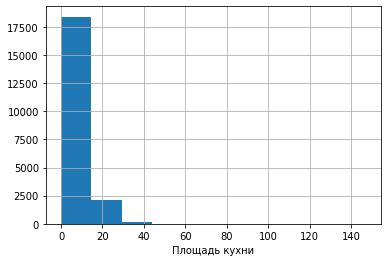

In [108]:
kitchen_top = (flats_total_area_below_200['total_area'] - flats_total_area_below_200['living_area']).max()

flats_total_area_below_200['kitchen_area'].hist(range = (0, kitchen_top))
plt.xlabel("Площадь кухни")

Очевидно, что площадь кухни, равная 50+ м2 - не совсем "обычная" история для квартир площадью 200 м2. Ограничимся этим значением и построим гистограмму по новому датафрейму. 

Text(0.5, 0, 'Площадь кухни')

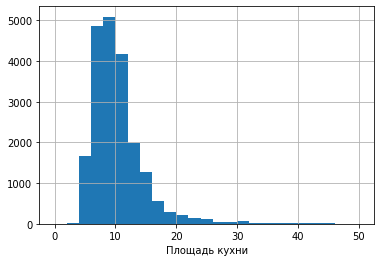

In [109]:
flats_kitchen_below_50 = flats_total_area_below_200[
    flats_total_area_below_200['kitchen_area'] <= 50]

flats_kitchen_below_50['kitchen_area'].hist(range = (0, 50), bins = 25)
plt.xlabel("Площадь кухни")

Гистограмма имеет нормальный вид, следовательно, дальнейшее преобразование данных в рассматриваемом столбце датафрейма не требуется. 

Переходим к заданию №2:


"Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"

Время продажи квартиры. 

Вообще, данного показателя, как такового у нас нет. У нас есть столбец, в котором имеется число дней между выставлением и снятием объявления. Соответственно, вполне возможно, что там присутствуют значения, не имеющие к времени продажи квартиры никакого отношения. Проверим это. Построим гистограмму распределения значений по столбцу 'days_exposition'. В качестве базового используем датасет 'flats_total_area_below_200', для удобства взаимодействия, переименуем его.

Text(0.5, 0, 'Длительность продажи')

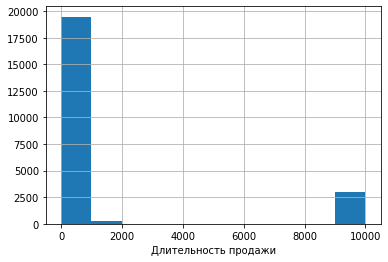

In [110]:
flats_clean_data = flats_total_area_below_200
flats_clean_data['days_exposition'].hist()
plt.xlabel("Длительность продажи")

Наши значения ограничены числом 2000. Создадим новый датасет, в котором будут отброшены выбросы (значения 9999) и определим для него статистически важные параметры - медиану, а также границы нормального распределения имеющегося датасета. 

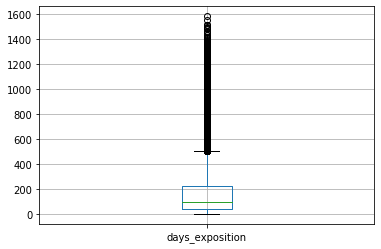

In [111]:
flats_sell_time = flats_clean_data[flats_clean_data['days_exposition'] < 2000]
flats_sell_time.boxplot(column = ['days_exposition'])

Для приведения датафрейма к статистически значимому виду, найдем значение верхнего уса - значение, равное Q3 + 1.5(Q3-Q1).

In [112]:
top_mustache = 2.5 * flats_sell_time.days_exposition.quantile(0.75) - 1.5 * flats_sell_time.days_exposition.quantile(0.25)
print("Верхний ус соответствует значению", top_mustache)


Верхний ус соответствует значению 502.5


Округлим полученное значение вниз - до 500 суток и построим гистограмму для нового датафрейма.

Text(0.5, 0, 'Длительность продажи')

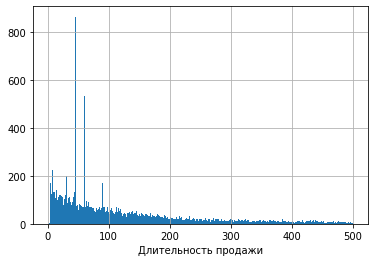

In [113]:
flats_sell_time_below_500 = flats_sell_time[flats_sell_time['days_exposition'] <= 500]
flats_sell_time_below_500['days_exposition'].hist(bins = 500)
plt.xlabel("Длительность продажи")

Разбив гистограмму по дням, видим наличие нескольких пиков на интервале 0 - 100 дней. Посмотрим, какие это значения, сгруппировав полученные данные по длительности продаж (в днях). Ограничимся первыми 10 (наибольшими) значениями.

In [114]:
flats_sell_time_below_500['days_exposition'].value_counts(ascending = False).head(15)

45    865
60    534
7     225
30    199
90    170
4     169
3     152
14    142
5     140
20    136
8     135
44    134
9     134
11    133
10    126
Name: days_exposition, dtype: int64

Среди пиковых значений наибольший интерес представляют значения, "привязанные" к длительности календарного месяца - 7,14,30,45,60,90 суток. Крайне маловероятно, что все эти значения отражают собой реальное положение дел - вероятно (как работает в случае с авито, юлой и другими агрегаторами), часть из этих данных представляет собой не что иное, как случаи автоматического закрытия объявлений по прошествии определенного (установленного системой или самим продавцом) срока. При этом мы не можем полностью удалить данные столбцы - наверняка среди них присутствуют и реальные случаи продаж. Тем не менее, мы можем убрать "пиковость" этих значений - например, посредством уменьшения значений в соответствующих точках до среднего значения между соседними точками. Для 14 суток - среднее между числом продаж между 13 и 15 сутками, для 30 - между 29 и 31 и т.д.


Text(0.5, 0, 'Длительность продажи')

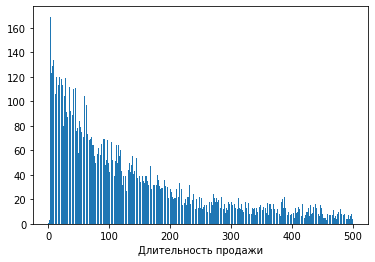

In [115]:
flats_days = flats_sell_time_below_500['days_exposition'].value_counts(ascending = False)

def correct_month_days(series, number):
    for i in series:
        if i == number:
            series[i] = (series[i-1] + series[i+1]) / 2

correct_month_days(flats_days, 7)
correct_month_days(flats_days, 14)
correct_month_days(flats_days, 30)
correct_month_days(flats_days, 45)
correct_month_days(flats_days, 60)
correct_month_days(flats_days, 90)

x = flats_days.index
y = flats_days
fig, ax = plt.subplots()
ax.bar(x, y)
plt.xlabel("Длительность продажи")

Получили столбчатую диаграмму следующего вида. Эти данные уже больше похоже на правду - очевидных выбросов в полученных данных не наблюдается. Сравним данный способ с вариантом озвученным выше - непосредственным выбросом ВСЕХ значений "пиковых точек" из датафрейма и сравним полученные графики.

Text(0.5, 0, 'Длительность продажи')

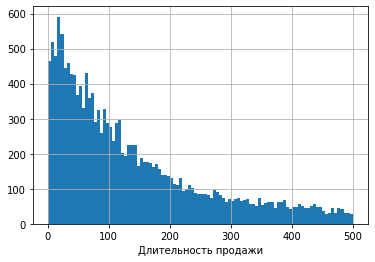

In [116]:
flats_correct_days = flats_sell_time_below_500[
    (flats_sell_time_below_500['days_exposition'] != 7) & 
    (flats_sell_time_below_500['days_exposition'] != 14) & 
    (flats_sell_time_below_500['days_exposition'] != 30) & 
    (flats_sell_time_below_500['days_exposition'] != 45) & 
    (flats_sell_time_below_500['days_exposition'] != 60) &
    (flats_sell_time_below_500['days_exposition'] != 90)
]
flats_correct_days['days_exposition'].hist(bins = 100)
plt.xlabel("Длительность продажи")

Гистограмма, полученная таким образом выглядит более наглядно (в т.ч., в связи с большим диапазоном объединения смежных значений - 5 против 1), по сравнению со столбчатой гистограммой, полученной выше. При этом, из исходного датафрейма было удалено порядка 2000 значений, что в нашем случае соответствует 10% от всех имеющихся данных. Однако, учитывая наличие ошибок в удаленных столбцах, значений "реально" потерянных данных составляет в 2-3 раза меньше озвученного выше значения в 2000 строк. Потому, в принципе, для дальнейшего анализа, мы можем воспользоваться полученным дата фреймом, т.к. в нашем случае потеря около 5% данных не столь существенна.

Таким образом, после удаления выбросов и редких значений, мы можем в очередной раз взглянуть на статистические показатели полученного датафрейма и сделать выводы.

In [117]:
flats_correct_days['days_exposition'].describe()

count    15962.000000
mean       137.244456
std        122.121451
min          1.000000
25%         41.000000
50%         98.000000
75%        198.000000
max        500.000000
Name: days_exposition, dtype: float64

В среднем, квартиры продаются за 130-140 дней, при этом, если квартира продается более 198 дней - это уже статистически слишком долго и продавцу, вероятно, стоит повторно ознакомиться с конъюнктурой рынка. Нижней планки длительности продажи, как таковой, нет - квартира вполне может быть продана за 1 день. Однако, если квартира продается менее чем за 41 день - это можно рассматривать как "слишком быструю" продажу.

Следующий этап - анализ влияния различных параметров на стоимость квартиры. 

Исследуем зависимость цены от:

 - площади квартиры (было написано - квадратного метра, я решил, что речь идет о площади)
 - числа комнат
 - удалённости от центра
 - этажа
 - даты размещения

1. Зависимость цены от площади квартиры

Зависимость определим посредством определения коэффициента корреляции между соответствующими параметрами. В качестве "базового" возьмем датасет flats_sell_time_below_500, как наиболее "очищенный" от некорректных данных.

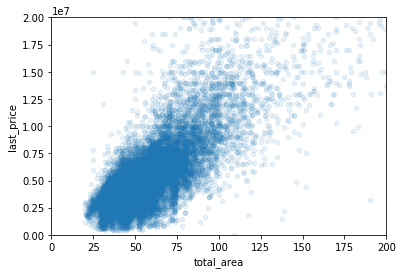

0.7649595634229092

In [118]:
flats_corr_base = flats_sell_time_below_500

def graph_plot(data, x_axe, y_axe, graph_kind, transp, x_axe_lim, y_axe_lim):
    data.plot(x = x_axe, y = y_axe, kind = graph_kind, alpha = transp, xlim = (0, x_axe_lim), ylim = (0, y_axe_lim))
    plt.show()
    
def corr_coef_calc(data,a,b):
    return data[a].corr(data[b])

graph_plot(flats_corr_base, 'total_area','last_price', 'scatter', 0.1, 200, 20000000)
corr_coef_calc(flats_corr_base, 'total_area','last_price')

Очистка данных от выбросов, а также удаление редких значений позволило нам установить иное положение дел, в отличие от результатов, полученных в предшествующей версии проекта. Если ранее коэффициент корреляции составил 0.34, то сейчас он оказался равным 0.765. Таким образом, можно утверждать о наличии сильной прямой корреляционной зависимости между общей площадью квартиры и её ценой. Однако, как было отмечено и в предыдущей версии проекта, начиная с 90-100 м2 и выше, цена квартиры начинает во многом опеределяться иными факторами, а не только общей площадью. 

2. Число комнат

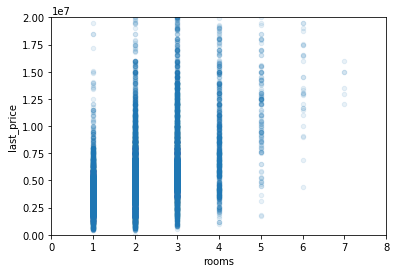

0.4970679998380023

In [119]:
graph_plot(flats_corr_base, 'rooms','last_price', 'scatter', 0.1, 8, 20000000)
corr_coef_calc(flats_corr_base, 'rooms','last_price')

В данном случае также наблюдается изменение полученной зависимости между числом комнат и ценой квартиры. Отрицательный коэффициент корреляции, полученный ранее "превратился" в среднюю прямую зависимость между показателями.

3. Удаленность от центра

В данном столбце присутствуют выбросы - избавимся от них а на основании оставшихся данных вычислим интересующие нас значения.

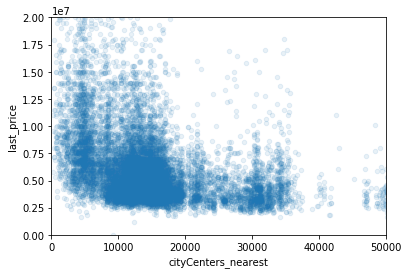

-0.35334810235056296

In [120]:
flats_center_dist_clean = flats_corr_base[flats_corr_base['cityCenters_nearest'] != 99999]

graph_plot(flats_center_dist_clean, 'cityCenters_nearest','last_price', 'scatter', 0.1, 50000, 20000000)
corr_coef_calc(flats_center_dist_clean, 'cityCenters_nearest','last_price')

Очевидной корреляции между анализируемыми показателями нет. Тем не менее, наблюдается следующая особенность зависимости между данными параметрами. График их зависимости имеет вид "угла" - до "граничного" значения вне зависимости от расстояния от центра, цена на квартиры может варьироваться в диапазоне практически любых значений стоимости. При этом, после "граничного" значения, составляющего в нашем случае 18-20 км, наблюдает существенное снижение диапазона варьирования значений и переход к типичной линейной зависимости - чем больше расстояние от центра, тем ниже цена на квартиру. 

Таким образом, можно предположить, что для квартир, расположенных в черте города и в ближайшей окрестности не прослеживается (20*2 = 40 км, с учетом диаметра Москвы в 35-47 км по данным Яндекс). Соответственно, цена от данного показателя (в черте города) практически не зависит).

4. Этаж (последний, первый, другой)

В этом случае нам предстоит построить график по результатам сводной таблицы.

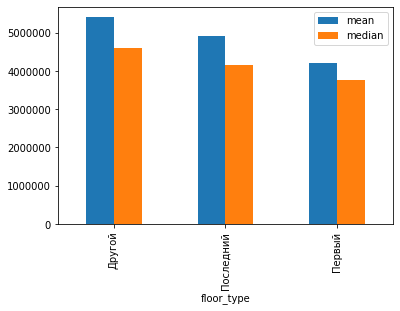

In [121]:
def graph_pivot_plot(data, ind, val, appfunc, knd):
    data.pivot_table(index = ind, values = val, aggfunc = ('median', 'mean')).sort_values(by = appfunc, ascending = False).plot(kind = knd)
    plt.show()
graph_pivot_plot(flats_corr_base, 'floor_type', 'last_price','mean', 'bar')


Полученные данные позволяют нам утверждать, что существует зависимость между этажом расположения квартиры и её стоимостью - наибольшая средняя и медианная стоимости соответствуют НЕ первому и НЕ последнему этажам. При этом первый этаж в глазах потребителей, явно проигрывает последнему, вероятно, в вопросе безопасноти и некоей "приватности" - на последнем никто не сможет (даже если очень захочет) смотреть вам в окна, вас "сложнее" ограбить и т.п. Часть этих предпосылок действительно имеет смысл, однако часть из них - не что иное, как мусор мыслительных процессов, попавший туда в раннем детстве и не проверенный собственным опытом и бездумно воспроизводимый.

5. Дата размещения

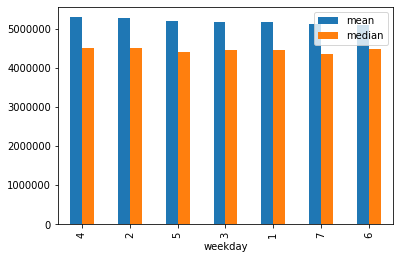

In [122]:
graph_pivot_plot(flats_corr_base, 'weekday', 'last_price','mean', 'bar')

Разница в средней и медианной стоимости квартир в зависимости от дня недели действительно есть, однако посредством доступных мне инструментов, какой-то структуры в них отследить не удалось. 

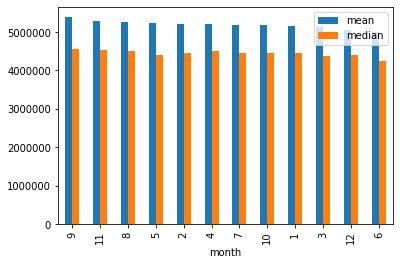

In [123]:
graph_pivot_plot(flats_corr_base, 'month', 'last_price', 'mean', 'bar')

Аналогично и в случае месяцев.

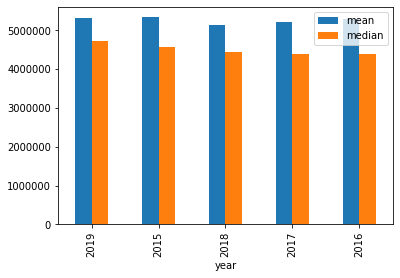

In [124]:
graph_pivot_plot(flats_corr_base, 'year', 'last_price', 'median', 'bar')

Анализируя данные, сгруппированные в разрезе годов, можно отметить падение цен на квартиры в 2016 году и их постепенное восстановление вплоть до 2019 года. 

Переходим к следующему пункту задания. 

Выберем 10 населенных пунктов с наибольшим числом объявлений.

In [125]:
flats_corr_base['locality_name'].value_counts().head(10)

Санкт-Петербург      11893
посёлок Мурино         459
посёлок Шушары         381
Всеволожск             303
Колпино                292
посёлок Парголово      282
Пушкин                 272
деревня Кудрово        251
Гатчина                244
Выборг                 193
Name: locality_name, dtype: int64

Вполне очевидно, что при анализе данных по Санкт-Петербургу, большая часть квартир будет из "барабанная дробь" Санкт-Петербурга. Всё остальное, за исключением Выборга - ближайший пригород СПб. Данных по населенным пунктам, не являющимися СПб, несравнимо меньше. Определим среднюю стоимость в зависимости от населенного пункта

In [126]:
table_locality = flats_corr_base.pivot_table(
    index = 'locality_name', values = 'm2_price', 
    aggfunc = ('mean', 'count')).sort_values(by = 'count', ascending = False).head(10)
table_locality.sort_values(by = 'mean', ascending = False)


,count,mean
locality_name,,
Санкт-Петербург,11893.0,106836.355924
Пушкин,272.0,100497.908088
деревня Кудрово,251.0,92426.087649
посёлок Парголово,282.0,89479.407801
посёлок Мурино,459.0,85322.588235
посёлок Шушары,381.0,77619.427822
Колпино,292.0,74671.513699
Гатчина,244.0,68064.717213
Всеволожск,303.0,66674.620462


Самая высокая стоимость жилья - очевидно, в Санкт-Петербурге и пригороде - например, г. Пушкин, а наименьшая - в Выборге, Всеволожске и т.д. Одна из логик варьирования цены - чем дальше от Питера, тем ниже цена, ведь наименьшее значение цены соответствует Выборгу. С другой стороны, остальные нас.пункты находятся на примерно одинаковом расстоянии от Питера - 15-30 км. Вероятно, здесь также присутствует какая-то ещё логика формирования цены, которую пока не прослеживается. 

Создадим датафрейм, полностью состоящий из значений для Санкт-Петербурга. Добавим в него столбец с расстоянием до центра в километрах. 

In [141]:
flats_SPb = flats_corr_base.query('locality_name == "Санкт-Петербург"')
flats_SPb = flats_SPb[flats_SPb['cityCenters_nearest'] != 99999]
flats_SPb['cityCenters_nearest_km'] = round(flats_SPb['cityCenters_nearest'] / 1000)

Построим график изменения цены на квартиры в зависимости от расстояния от центра. 

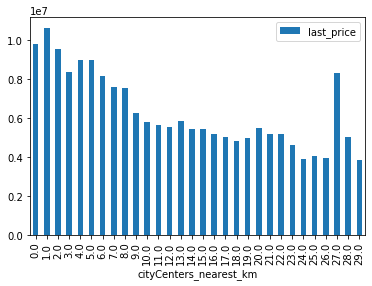

In [142]:
flats_SPb.pivot_table(
    index = 'cityCenters_nearest_km', 
    values = 'last_price', 
    aggfunc = 'mean').plot(kind = 'bar')

На расстоянии примерно 3 км от центра наблюдается резкое падение цены по сравнению с предшествующими точками. Вероятно, именно здесь и проходит граница предполагаемого "центра города".

Вынесем в отдельный датафрейм квартиры, относящиеся к центру - находящиеся на расстоянии до 3 км от центра.

In [143]:
flats_SPb_center = flats_SPb[flats_SPb['cityCenters_nearest_km'] <= 3]

Создадим функцию для сравнения гистограмм распределения значений различных параметров в зависимости от местоположения объекта недвижимости - в центре или во всем городе. Помним, что второй дата фрейм включает в себя первый в полном объеме.

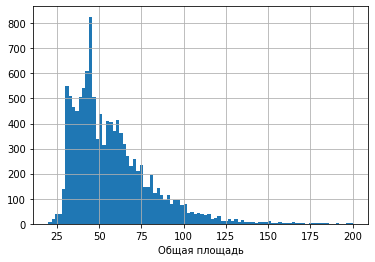

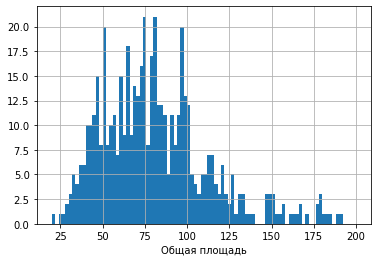

In [167]:
def double_hist_plot(clmn, x_axe_name, bns, rng_d, rng_u):
    flats_SPb[clmn].hist(bins = bns, range = (rng_d, rng_u))
    plt.xlabel(x_axe_name)
    plt.show()
    flats_SPb_center[clmn].hist(bins = bns, range = (rng_d, rng_u))
    plt.xlabel(x_axe_name)
    plt.show()
    
    
double_hist_plot('total_area', "Общая площадь", 90, 20, 200)

Гистограмма, полученная для СПб, по своей форме и структуре распределения пиковых значений (одно-, двух- и трехкомнатных квартир) очень похожа на гистограмму, полученную ранее для всего дата-фрейма. В случае же с квартирами, рассположенными в центре города, можно утверждать, что для них средняя площадь больше, чем по городу в целом. Вероятно, это обусловлено изначально иными запросами на строящееся там жильё. Изрезанность гистограммы во втором случае обусловлена кардинально меньшим объемом анализируемых данных.

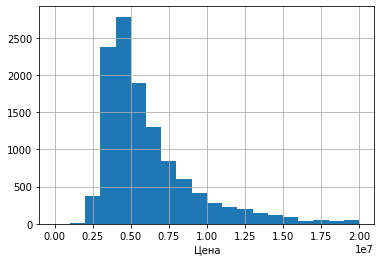

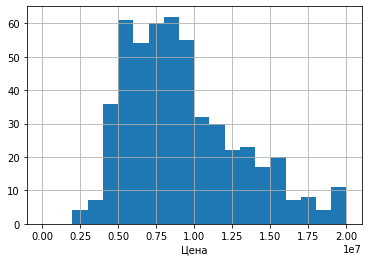

In [168]:
double_hist_plot('last_price', "Цена", 20, 0, 20000000)

По аналогии с площадью, цена на квартиры в центре в среднем в 1.5-2 раза выше, чем по городу в целом. Тем не менее, для квартир в центре распределение носит скорее нормальный характер, без существенных скосов, что, вероятно, указывает на преимущественную типизацию жилого фонда центрального района СПб - т.е. несмотря на большую среднюю стоимость, максимальные значения цены здесь также существенно ограничены, в отличии от ситуации по городу в целом. Наличие свободных площадей, пусть и расположенных вне центра города, позволяют построить там ЛЮБУЮ неждвижимость с любым количеством этажей и комнат, в отличие от центра города, на "нестандартную застройку" и "перестройку" которого наложены существенные ограничения его "историчностью" и культурной важностью.

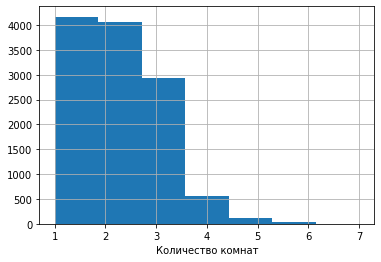

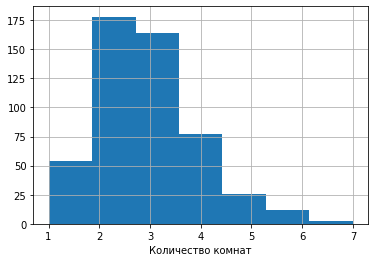

In [169]:
double_hist_plot('rooms', "Количество комнат", 7, 1, 7)

Комнат в центральных объектах недвижимости Санкт-Петербурга, также, в среднем, больше - 2-3 комнаты в противовес 1-2 комнатам по всему городу. Также, для центра характерно наличие квартир с числом комнат >3, что объясняется предпосылками, описанными в 2 предшествующих пунктах - иные изначальные запросы (дворянства и элит города раннего времени), "старый" фонд и т.д.

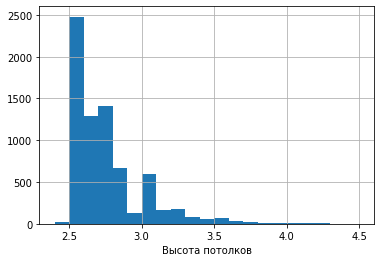

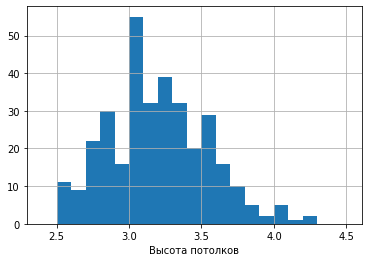

In [170]:
double_hist_plot('ceiling_height', "Высота потолков", 21, 2.4, 4.5)

В квартирах центра потолки в среднем выше, чем по всему городу - 3-3.5 метра против 2.5-2.8. Предпосылки и возможные причины возникновения этого эффекта описаны в предыдущих пунктах. 

Последняя поставленная перед нами задача - установить влияние параметров на цену квартир в центре Санкт-Петрбурга. Воспользуемся созданными ранее функциями graph_plot и corr_coef_calc. Начнем с расстояния до центра города

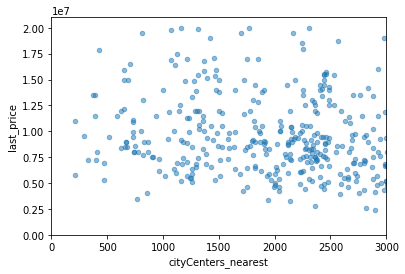

-0.20295921087813737

In [175]:
graph_plot(flats_SPb_center, 'cityCenters_nearest','last_price', 'scatter', 0.5, 3000, 21000000)
corr_coef_calc(flats_SPb_center, 'cityCenters_nearest','last_price')

В отличие от ситуации по "всему городу", в случае квартир в центре, ни о какой корреляции между ценой и расстоянием не может идти и речи. Квартиры УЖЕ в "элитном" и "статусном" районе, о какой корреляции может идти речь? Это подтверждается и полученным графиком. Наверянка, в дело здесь вступают иные факторы - проверим это. Посмотрим на зависимость цены от числа комнат.

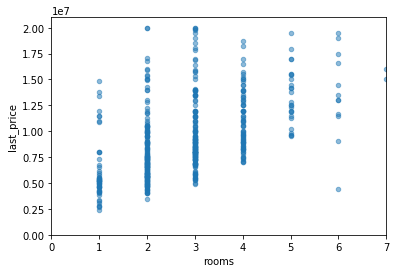

0.5164052312424249

In [176]:
graph_plot(flats_SPb_center, 'rooms','last_price', 'scatter', 0.5, 7, 21000000)
corr_coef_calc(flats_SPb_center, 'rooms','last_price')

В случае числа комнат, корреляционная зависимость имеет вид, схожий с полученной ранее для всего города. Однако, стоит отметить важный момент - в отличие от исходного датафрейма, для квартир в центре характерно наличие некоторой "неписанной" границы, ниже которой цена практически не опускается - около 2.5 млн для однокомнатной квартиры, 3.5 для двухкомнатной, 5 для трех-, 7 для четырех- и т.д.

Для анализа влияния этажа расположения квартиры, воспользуемся функцией graph_pivot_plot.

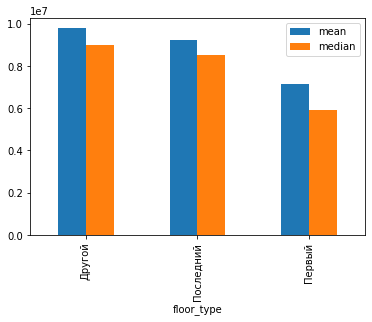

In [177]:
graph_pivot_plot(flats_SPb_center, 'floor_type', 'last_price','mean', 'bar')

В целом, ситуация в центре не отличается от ситуации по городу в целом - квартиры на первом этаже также востребованы (судя по цене) меньше всего, а квартиры не на первом и не на последнем этажах - больше всего. Единственный нюанс - медианная и средняя цены для квартир, на последнем и "других" этажах в центральной части города отличаются куда меньше, чем по городу в целом. 

Последний пункт - проверить влияние дня недели/месяца и года на цену квартир в центре. Начнем с дня недели.

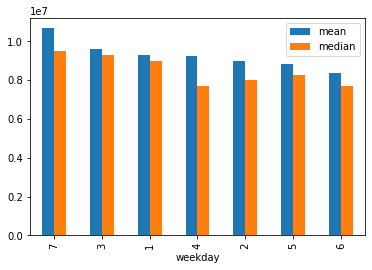

In [178]:
graph_pivot_plot(flats_SPb_center, 'weekday', 'last_price','mean', 'bar')

Судя по полученным данным, лучше всего (т.е. ДОРОЖЕ всего), квартиры в центре продаются в воскресенье. Причины данного явления необходимо дополнительно исследовать, т.к. мне думается, что это обусловлено крайне небольшим объемом анализируемых данных. Вероятно, на большем масштабе это отличие будет существенно сглажено в сторону уравнивания с другими днями.

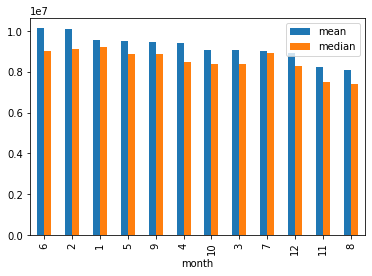

In [180]:
graph_pivot_plot(flats_SPb_center, 'month', 'last_price','mean', 'bar')

С точки зрения месяца, некоторая структура также присутствует в представленных данных, однако, на мой взгляд, извлечь из неё логику её возникновения на данном этапе и известными мне способами анализа невозможно. 

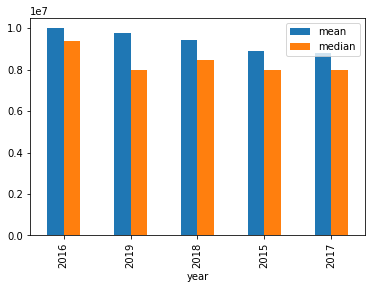

In [184]:
graph_pivot_plot(flats_SPb_center, 'year', 'last_price','mean', 'bar')

С точки зрения года продажи квартиры, колебания цен в центре города год к году было куда существеннее, в отличие от всего города в целом. Однако, по-прежнему, логика и структура в представленных данных может быть извлечена лишь с привлечением специалиста в данной области, хорошо знакомого с ситуацией на соответствующем рынке.

## 4. Выводы

Цель проекта:

Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

Итого:

Среди всего перечня рассмотренных параметров, в качестве основных, оказывающих влияние на стоимость объектов недвижимости, можно рассматривать:

1) Общую площадь. Установлена сильная прямая корреляция между площадью квартир и их ценой; при этом, необходимо учитывать, что с повышением общей площади наблюдается рост диапазона варьирования цены. Так, начиная со значения 100 м2, диапазон варьирования цены увеличивается в 5-6 раз и прямая зависимость между площадью квартиры и ценой перестает прослеживаться - в дело вступают иные факторы. ;

2) Расстояние до центра города; цены на квартиры в центре в среднем в 2 раза превышают цену на аналогичную квартиру в другом районе города. По аналогии с площадью, чем ближе квартира к центру, тем больше становится диапазон разброса цен на недвижимость. Так, если квартира УЖЕ расположена в центре, диапазон варьирования цен также вырастает в несколько раз;

3) Этаж. Чем меньше этаж (исключая 1й), тем выше возможный диапазон варьирования цены на квартиру. И, напротив, с повышением этажности, цена всё сильнее "прижимается" к некоторому усредненному значению (примерно с 18-20 этажа). 

4) Год, месяц и день недели выставления, вероятно, не оказывают прямого влияния на цену квартиры. Значения, полученные для данных параметров, скорее могут быть использованы в качестве маркеров общей ситуации в городе/стране в различные моменты времени (года).

